In [1]:
#install tensorflow
#load the dataset
#plot the data
#find the labels
#augment the data
#use the cifar architecture sample from udacity
#try resnet & compare performance measures
#research the best architecture & compare performance measures
#implement the architecture

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.load('fashion_mnist_dataset_train.npy', allow_pickle=True).item()

In [4]:
data

{'features': array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0

In [5]:
data['features'][0][6]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.60784314,
       0.9254902 , 0.81176471, 0.69803922, 0.41960784, 0.61176471,
       0.63137255, 0.42745098, 0.25098039, 0.09019608, 0.30196078,
       0.50980392, 0.28235294, 0.05882353])

In [6]:
data['features'].shape

(60000, 28, 28)

In [7]:
data['features'][0][6].shape

(28,)

In [8]:
data['target']

array([5., 2., 1., ..., 3., 1., 4.])

In [9]:
data['target'].shape

(60000,)

In [11]:
from sklearn.model_selection import train_test_split
# Splitting the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(data['features'], data['target'], test_size=0.2, random_state=275)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=275)

In [12]:
X_train.shape

(48000, 28, 28)

In [13]:
X_val.shape

(6000, 28, 28)

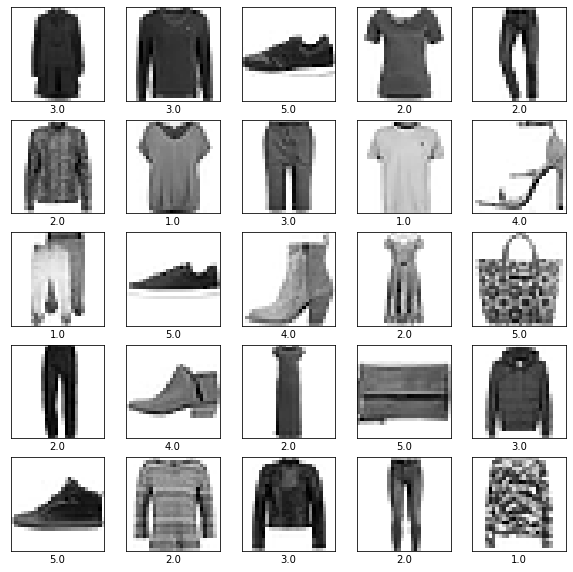

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [24]:
#plot the label distribution
import pandas as pd
df_label = pd.DataFrame(data['target'])

In [25]:
df_label

,0
0,5.0
1,2.0
2,1.0
3,2.0
4,1.0
...,...
59995,4.0
59996,2.0
59997,3.0
59998,1.0


In [26]:
df_label.value_counts()

2.0    12019
3.0    12011
4.0    11992
1.0    11989
5.0    11989
dtype: int64

Data is almost evenly distributed among the labels

In [30]:
# Deep Learning Libraries
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)  # randomly flip images

In [32]:
datagen.fit(X_train)

ValueError: Input to `.fit()` should have rank 4. Got array with shape: (48000, 28, 28)

In [ ]:
#understand shapes from tutorials
#finish augmentation
#plot augmentation
#construct model with layers
#fit without augmentation
#train
#fit with augmentation
#compare accuracies